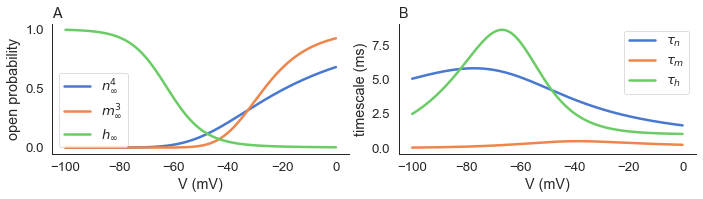

In [2]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################



# Define gating variables as inline functions
alphan = lambda V: .01*(V+55)/(1-np.exp(-.1*(V+55)))
betan = lambda V: .125*np.exp(-.0125*(V+65))
alpham = lambda V: .1*(V+40)/(1-np.exp(-.1*(V+40)))
betam = lambda V: 4*np.exp(-.0556*(V+65))
alphah = lambda V: .07*np.exp(-.05*(V+65))
betah = lambda V: 1/(1+np.exp(-.1*(V+35)))

# Functions to convert from alpha/beta to x/tau convention
xinfty = lambda alpha,beta: alpha/(alpha+beta)
taux = lambda alpha,beta: 1/(alpha+beta)

# Membrane potential for plotting
Vs=np.arange(-100,0,.1)

# Make figure
plt.subplots(figsize=(10,3))



plt.subplot(1,2,1)
plt.plot(Vs,xinfty(alphan(Vs),betan(Vs))**4,label=r'$n_\infty^4$')
plt.plot(Vs,xinfty(alpham(Vs),betam(Vs))**3,label=r'$m_\infty^3$')
plt.plot(Vs,xinfty(alphah(Vs),betah(Vs)),label=r'$h_\infty$')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('open probability')
plt.title('A',loc='left')
sns.despine()


plt.subplot(1,2,2)
plt.plot(Vs,taux(alphan(Vs),betan(Vs)),label=r'$\tau_n$')
plt.plot(Vs,taux(alpham(Vs),betam(Vs)),label=r'$\tau_m$')
plt.plot(Vs,taux(alphah(Vs),betah(Vs)),label=r'$\tau_h$')
plt.legend()
plt.xlabel('V (mV)')
plt.ylabel('timescale (ms)')
plt.title('B',loc='left')
sns.despine()

plt.tight_layout()


# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/HHgating.pdf')
